In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
# Импорт библиотек

In [2]:
# Загрузка данных
data = pd.read_csv('data/requests_every_hour.csv')
data

,Requests
0,100
1,113
2,162
3,186
4,228
...,...
835,122
836,108
837,51
838,68


In [3]:
print(f'Количество строк исходных данных: {data.shape[0]}\nКоличество столбцов исходных данных: {data.shape[1]}')

Количество строк исходных данных: 840
Количество столбцов исходных данных: 1


In [4]:
data.isna().sum()

Requests    0
dtype: int64

In [5]:
data.dtypes

Requests    int64
dtype: object

**Requests** - Отражает временной ряд почасовой нагрузки на сервис, выраженной в числовом формате типа int64

In [6]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim

# Загрузка данных
df = pd.read_csv('data/requests_every_hour.csv')

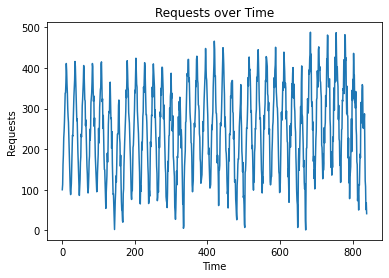

In [7]:
import matplotlib.pyplot as plt

plt.plot(df['Requests'])
plt.title('Requests over Time')
plt.xlabel('Time')
plt.ylabel('Requests')
plt.show()

In [8]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden_layer = nn.Linear(1, 10)
        self.output_layer = nn.Linear(10, 1)
        self.activation = nn.ReLU()

    def forward(self, x):
        x = self.activation(self.hidden_layer(x))
        x = self.output_layer(x)
        return x


In [9]:
n = 5

In [10]:
import torch.optim as optim
from sklearn.model_selection import train_test_split

# Подготовка данных
X = data['Requests'].values[:-n]
y = data['Requests'].values[n:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение модели и функции потерь
net = Net()
criterion = nn.MSELoss()

# Определение оптимизатора
optimizer = optim.SGD(net.parameters(), lr=0.001)

# Обучение модели
for epoch in range(5000):
    inputs = torch.from_numpy(X_train.reshape(-1, 1).astype('float32'))
    labels = torch.from_numpy(y_train.reshape(-1, 1).astype('float32'))

    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, loss: {loss.item():.4f}')


Epoch 0, loss: 29749.7246
Epoch 100, loss: 2314166.5000
Epoch 200, loss: 1554416.0000
Epoch 300, loss: 1045344.7500
Epoch 400, loss: 704240.0000
Epoch 500, loss: 475682.6250
Epoch 600, loss: 322537.3750
Epoch 700, loss: 219922.1719
Epoch 800, loss: 151164.6875
Epoch 900, loss: 105093.6172
Epoch 1000, loss: 74223.6250
Epoch 1100, loss: 53539.1445
Epoch 1200, loss: 39679.4688
Epoch 1300, loss: 30392.7715
Epoch 1400, loss: 24170.2207
Epoch 1500, loss: 20000.7793
Epoch 1600, loss: 17207.0410
Epoch 1700, loss: 15335.0986
Epoch 1800, loss: 14080.7930
Epoch 1900, loss: 13240.3457
Epoch 2000, loss: 12677.2051
Epoch 2100, loss: 12299.8672
Epoch 2200, loss: 12047.0283
Epoch 2300, loss: 11877.6172
Epoch 2400, loss: 11764.1006
Epoch 2500, loss: 11688.0400
Epoch 2600, loss: 11637.0732
Epoch 2700, loss: 11602.9238
Epoch 2800, loss: 11580.0430
Epoch 2900, loss: 11564.7100
Epoch 3000, loss: 11554.4375
Epoch 3100, loss: 11547.5557
Epoch 3200, loss: 11542.9414
Epoch 3300, loss: 11539.8516
Epoch 3400, lo

RMSE: 109.47, MAE: 92.39


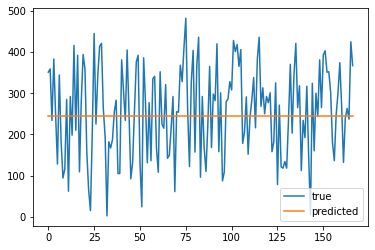

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Предсказание результатов
with torch.no_grad():
    test_inputs = torch.from_numpy(X_test.reshape(-1, 1).astype('float32'))
    test_outputs = net(test_inputs)

# Оценка метрик
mse = criterion(test_outputs, torch.from_numpy(y_test.reshape(-1, 1).astype('float32')))
rmse = np.sqrt(mse.item())
mae = nn.L1Loss()(test_outputs, torch.from_numpy(y_test.reshape(-1, 1).astype('float32'))).item()

print(f'RMSE: {rmse:.2f}, MAE: {mae:.2f}')

# Визуализация результатов
plt.plot(y_test, label='true')
plt.plot(test_outputs.numpy(), label='predicted')
plt.legend()
plt.show()


In [24]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Генерация данных
data = np.random.randint(low=10, high=100, size=1000)

# Формирование данных для обучения
X_train = []
y_train = []
for i in range(len(data)-5):
    X_train.append(data[i:i+5])
    y_train.append(data[i+5:i+10])
X_train = np.array(X_train)
y_train = np.array(y_train)

# Создание модели LSTM
model = Sequential()
model.add(LSTM(units=50, input_shape=(5, 1)))
model.add(Dense(units=5))
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
model.fit(X_train.reshape(-1, 5, 1), y_train.reshape(-1, 5), epochs=100, batch_size=32)

# Генерация предсказаний
test_data = np.random.randint(low=10, high=100, size=5)
X_test = np.array([test_data])
predictions = model.predict(X_test.reshape(-1, 5, 1))
print(predictions)


ModuleNotFoundError: No module named 'tensorflow.python'